In [2]:
#!pip install yfinance

In [9]:
import yfinance as yf
data = yf.download("AMZN", period="1y")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
2022-12-08,89.239998,90.860001,87.879997,90.349998,90.349998,73305900
2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67398500
...,...,...,...,...,...,...
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000


In [11]:
df = data['Close']
df

Date
2022-12-05     91.010002
2022-12-06     88.250000
2022-12-07     88.459999
2022-12-08     90.349998
2022-12-09     89.089996
                 ...    
2023-11-28    147.029999
2023-11-29    146.320007
2023-11-30    146.089996
2023-12-01    147.029999
2023-12-04    144.839996
Name: Close, Length: 251, dtype: float64

Text(0.5, 1.0, 'Trend of Closing Price')

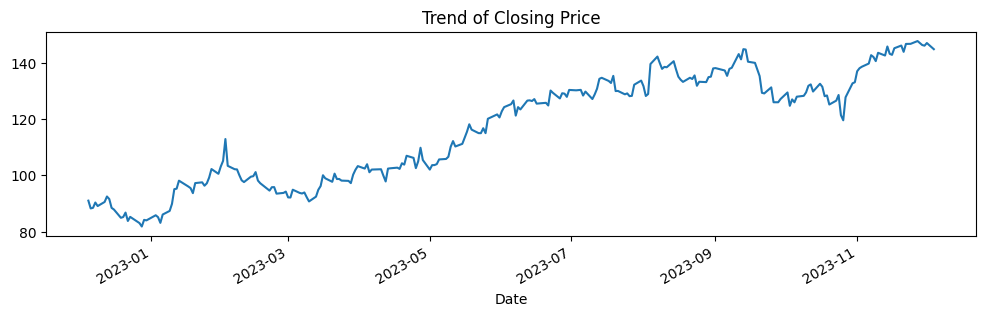

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
df.plot(linewidth  =1.5)
plt.title("Trend of Closing Price")

In [19]:
df1 = df.reset_index()
df1

,Date,Close
0,2022-12-05,91.010002
1,2022-12-06,88.250000
2,2022-12-07,88.459999
3,2022-12-08,90.349998
4,2022-12-09,89.089996
...,...,...
246,2023-11-28,147.029999
247,2023-11-29,146.320007
248,2023-11-30,146.089996
249,2023-12-01,147.029999


In [21]:
#df1['Date'] = pd.to_datetime(df1['Date'])  #### This is the way for conversion of your datetime object
df1['day'] = df1['Date'].dt.day

In [23]:
df1['month'] = df1['Date'].dt.month
df1['weekday'] = df1['Date'].dt.day_name()

In [24]:
df1

,Date,Close,day,month,weekday
0,2022-12-05,91.010002,5,12,Monday
1,2022-12-06,88.250000,6,12,Tuesday
2,2022-12-07,88.459999,7,12,Wednesday
3,2022-12-08,90.349998,8,12,Thursday
4,2022-12-09,89.089996,9,12,Friday
...,...,...,...,...,...
246,2023-11-28,147.029999,28,11,Tuesday
247,2023-11-29,146.320007,29,11,Wednesday
248,2023-11-30,146.089996,30,11,Thursday
249,2023-12-01,147.029999,1,12,Friday


<Axes: xlabel='day'>

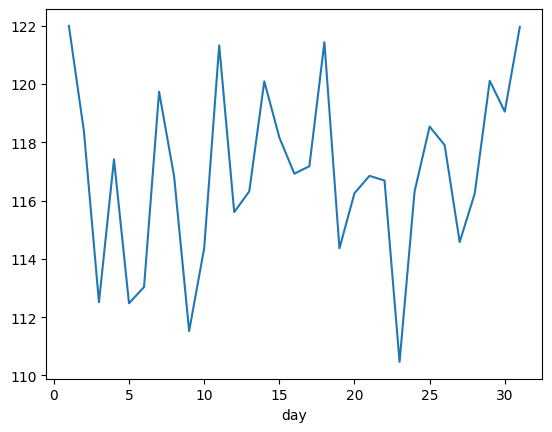

In [26]:
df1.groupby('day')['Close'].mean().plot()

In [29]:
df1.groupby('weekday')['Close'].mean().sort_index()

weekday
Friday       117.324117
Monday       118.370870
Thursday     115.917843
Tuesday      115.929412
Wednesday    116.208463
Name: Close, dtype: float64

In [30]:
df

Date
2022-12-05     91.010002
2022-12-06     88.250000
2022-12-07     88.459999
2022-12-08     90.349998
2022-12-09     89.089996
                 ...    
2023-11-28    147.029999
2023-11-29    146.320007
2023-11-30    146.089996
2023-12-01    147.029999
2023-12-04    144.839996
Name: Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

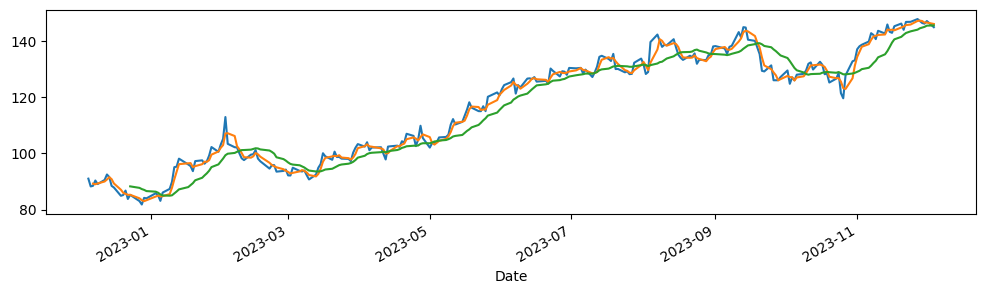

In [47]:
#### Simple MOving Average  - 3, 15 Days
plt.figure(figsize=(12,3))
df.plot()
df.rolling(3).mean().plot()
df.rolling(15).mean().plot()

In [ ]:
ARIMA  - Forecasting Time Series Data


<Axes: xlabel='Date'>

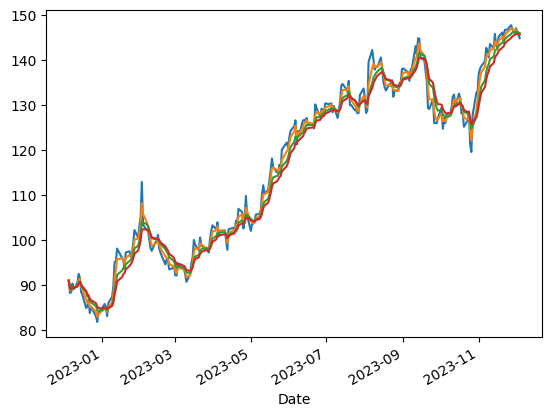

In [51]:
#### Exponential Moving Average ewm
df.plot()
df.ewm(span = 3).mean().plot() #### Number of rows to compare 
df.ewm(span = 7).mean().plot()
df.ewm(span = 10).mean().plot()

In [ ]:
ARIMA  = Auto regressive Integarted Moving Average
#### Stationarity  - A stationary timeseries data is one whose properties
#### do not depend on time.That is why timeseries with trends, seasonality are not stationary data
#### Stationary timeseries will have no predictable patterns in the longterm

In [ ]:
# An Arima model is a class of statistical models for analyzing and forecasting timeseries data
# It is very powerful and very simple to utilise

In [ ]:
AR I MA
#### p, d, q
# p The number of lag observations included in the model also called as lag order.
# d The number of times the raw observations are differenced, also called the degree of difference
# q The size of the moving average window, also called as order of moving average.

#### Test whether and what will be the pdq value


In [52]:
df

Date
2022-12-05     91.010002
2022-12-06     88.250000
2022-12-07     88.459999
2022-12-08     90.349998
2022-12-09     89.089996
                 ...    
2023-11-28    147.029999
2023-11-29    146.320007
2023-11-30    146.089996
2023-12-01    147.029999
2023-12-04    144.839996
Name: Close, Length: 251, dtype: float64

In [ ]:
#### to Check whether the data is stationary or not - We use Adfuller test

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
test_result = adfuller(df)
test_result

(-0.8406314763032262,
 0.8068946442304045,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1090.7470032866524)

In [57]:
df1 = df1[['Date','Close']]

In [62]:
df1['Close First Diff'] = df1['Close'] - df1['Close'].shift(1)

C:\Users\proyas.bose\AppData\Local\Temp\ipykernel_12564\3137070692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close First Diff'] = df1['Close'] - df1['Close'].shift(1)


In [64]:
df1['Close Seasonal First Diff'] = df1['Close'] - df1['Close'].shift(12)
df1

C:\Users\proyas.bose\AppData\Local\Temp\ipykernel_12564\4260491087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Close Seasonal First Diff'] = df1['Close'] - df1['Close'].shift(12)


,Date,Close,Close First Diff,Close Seasonal First Diff
0,2022-12-05,91.010002,NaN,NaN
1,2022-12-06,88.250000,-2.760002,NaN
2,2022-12-07,88.459999,0.209999,NaN
3,2022-12-08,90.349998,1.889999,NaN
4,2022-12-09,89.089996,-1.260002,NaN
...,...,...,...,...
246,2023-11-28,147.029999,-0.699997,6.429993
247,2023-11-29,146.320007,-0.709991,2.760010
248,2023-11-30,146.089996,-0.230011,3.500000
249,2023-12-01,147.029999,0.940002,1.229996


In [68]:
df1['Close First Diff'].dropna()

1     -2.760002
2      0.209999
3      1.889999
4     -1.260002
5      1.460007
         ...   
246   -0.699997
247   -0.709991
248   -0.230011
249    0.940002
250   -2.190002
Name: Close First Diff, Length: 250, dtype: float64

In [69]:
test_result = adfuller(df1['Close First Diff'].dropna())
test_result

(-12.862361712845365,
 5.0786086724870205e-24,
 1,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1086.6799317509397)

<Axes: >

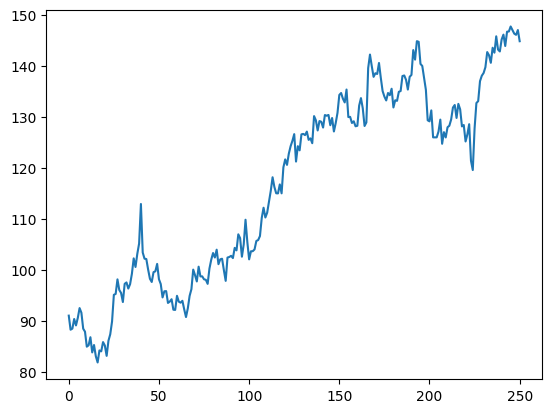

In [72]:
df1['Close'].plot()

<Axes: >

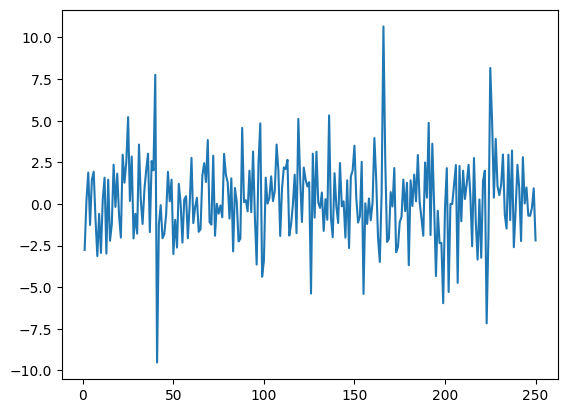

In [70]:
df1['Close First Diff'].plot()

In [74]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

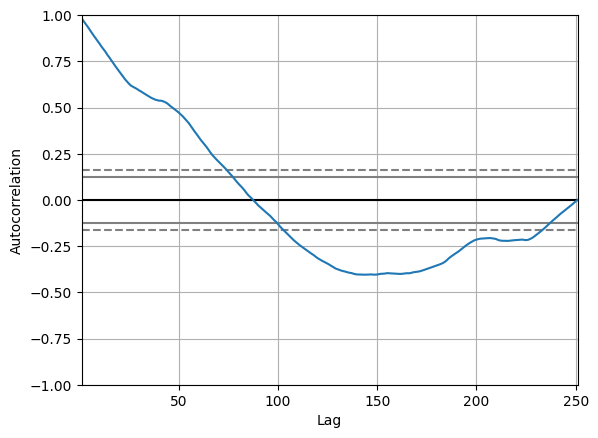

In [75]:
autocorrelation_plot(df1['Close'])

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

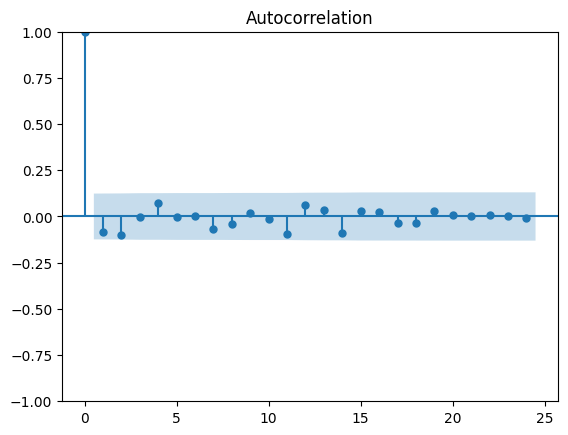

In [81]:
plot_acf(df1['Close First Diff'].dropna()) #### p  = 1
plt.show()

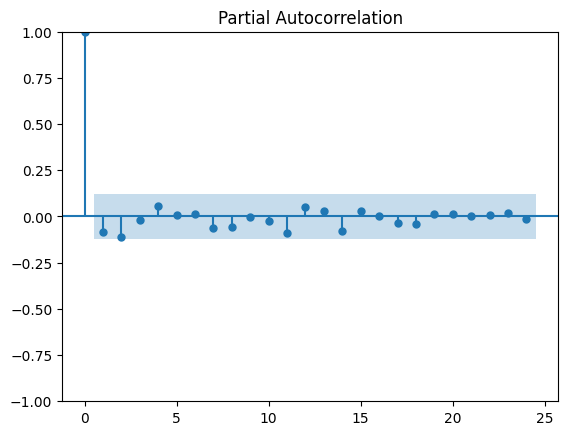

In [82]:
plot_pacf(df1['Close First Diff'].dropna()) #### q  = 1
plt.show()

In [90]:
#### Order = p,d,q (1,1,1)
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(df1['Close'],order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -578.883
Date:                Tue, 05 Dec 2023   AIC                           1163.766
Time:                        20:12:25   BIC                           1174.330
Sample:                             0   HQIC                          1168.018
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3475      0.493      0.705      0.481      -0.619       1.314
ma.L1         -0.4420      0.472     -0.937      0.349      -1.367       0.483
sigma2         6.0081      0.401     15.000      0.000       5.223       6.793
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.67
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.16
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

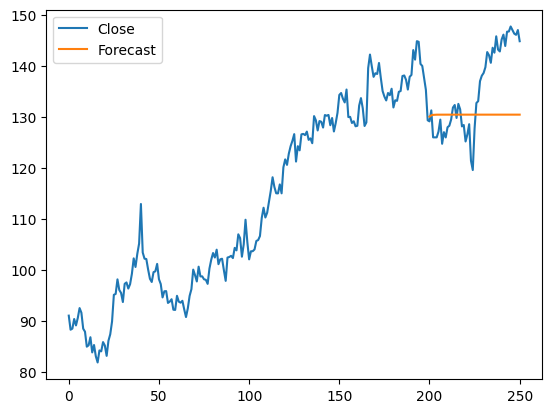

In [95]:
df1['Forecast'] = model_fit.predict(start = 200, end = 280, dynamic = True)
df1[['Close','Forecast']].plot()

In [120]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df1['Close'],order = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()
print(results)

<Axes: >

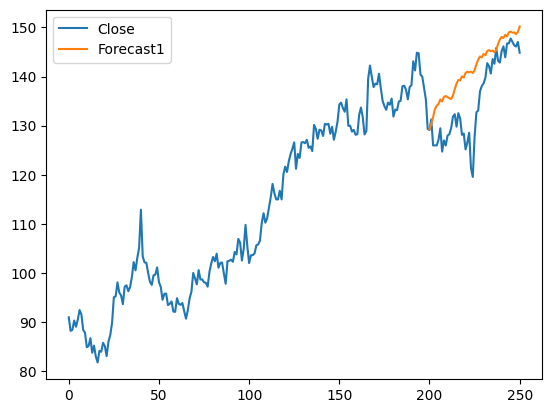

In [99]:
df1['Forecast1'] = results.predict(start = 200, end = 270, dynamic = True)
df1[['Close','Forecast1']].plot()

In [100]:
df1

,Date,Close,Close First Diff,Close Seasonal First Diff,Forecast,Forecast1
0,2022-12-05,91.010002,NaN,NaN,NaN,NaN
1,2022-12-06,88.250000,-2.760002,NaN,NaN,NaN
2,2022-12-07,88.459999,0.209999,NaN,NaN,NaN
3,2022-12-08,90.349998,1.889999,NaN,NaN,NaN
4,2022-12-09,89.089996,-1.260002,NaN,NaN,NaN
...,...,...,...,...,...,...
246,2023-11-28,147.029999,-0.699997,6.429993,130.434582,148.900691
247,2023-11-29,146.320007,-0.709991,2.760010,130.434582,148.968616
248,2023-11-30,146.089996,-0.230011,3.500000,130.434582,148.608074
249,2023-12-01,147.029999,0.940002,1.229996,130.434582,149.057378


In [129]:
# Forecast for the next 3 years 
df1['forecast123'] = results.predict(start = len(df1), #### 250 
                          end = (len(df1)) + 4 * 12,  
                          typ = 'levels').rename('Forecast')

E:\test_env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

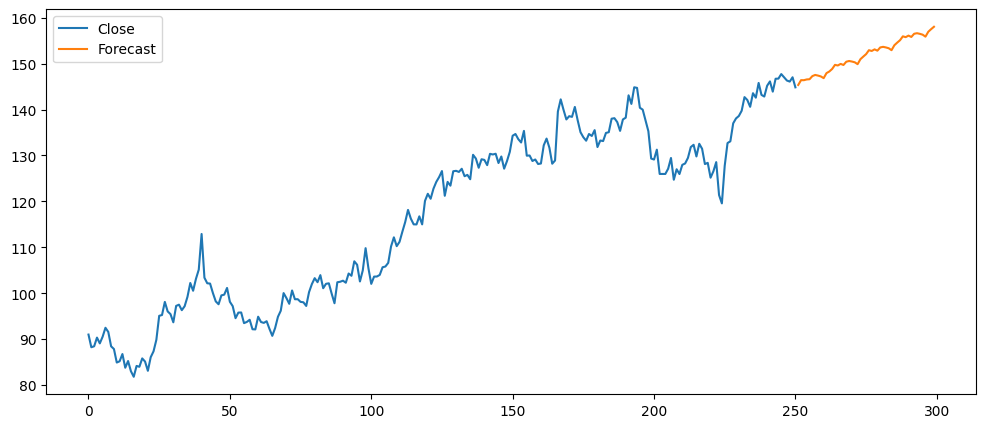

In [127]:
df1['Close'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [130]:
df1

,Date,Close,Close First Diff,Close Seasonal First Diff,Forecast,Forecast1,forecast123
0,2022-12-05,91.010002,NaN,NaN,NaN,NaN,NaN
1,2022-12-06,88.250000,-2.760002,NaN,NaN,NaN,NaN
2,2022-12-07,88.459999,0.209999,NaN,NaN,NaN,NaN
3,2022-12-08,90.349998,1.889999,NaN,NaN,NaN,NaN
4,2022-12-09,89.089996,-1.260002,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
246,2023-11-28,147.029999,-0.699997,6.429993,130.434582,148.900691,NaN
247,2023-11-29,146.320007,-0.709991,2.760010,130.434582,148.968616,NaN
248,2023-11-30,146.089996,-0.230011,3.500000,130.434582,148.608074,NaN
249,2023-12-01,147.029999,0.940002,1.229996,130.434582,149.057378,NaN


In [ ]:
#### F,GOOGL